Justin Roderick<div>
CAP 4630<div>
5239523

# Convolution Neural Network Homework

This is the 3rd homework assignment for CAP 4630 and we will go through some primary operations for image processsing and implement one of the earilest representative convolution neural network - LeNet-5 . \
You will use **"Tasks"** and **"Hints"** to finish the work. **(Total 100 Points)** \
For section 1, when you implement covolution and maxpooling, you are **not** allowed to use built-in functions in Machine Learning libaries such as Scikit-learn Keras, Tensorflow, Pytorch; but you are encouraged to employ Keras for second section.

**Task Overview:**
- Basic operations for Digital Image Processing (DIP)
- LeNet-5 (Google Colab is recommended for implementation)

## 1 - Basic Image Processing ##
### 1.1 Data Preparation

Import packages and prepare image data as an array for image processing. **(5 Points)**

**Tasks:**
1. Import numpy and rename it to np.
2. Import imageio and call imread to convert image to an array.
3. **DISPLAY** the image in the output box before image-array conversion.
4. **PRINT OUT** the size of the array
5. **PRINT OUT** the numeric matrix form of image, i.e. the obtained array after image-array conversion.

References:
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [imageio](https://imageio.github.io/) is a python library for basic image reading and writing.

**Hints:**
1. Image data is under current directory, i.e., "./image.jpg".
2. You may consider importing "display" and "Image" from IPython.display for image display.

In [11]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio
from IPython.display import display, Image

# Display original image
display(Image(filename='./image.jpg'))

# # Convert image to array, print out the shape of array, and print out the entire array
image = imageio.imread('./image.jpg')
print(image.shape)
print(image)

(30, 30)
[[ 98  89  78 112  90  93 158 112 122 117 107 121  90  75  67  93  73  67
   96 152 167 151 166 154 134 105  53  51  55  44]
 [ 34  31  51  38  16  50 195 161 138 173 200 209 194 206 222 237 223 195
  177 185 167 160 166 169 136  98  49  54  55  35]
 [ 78  84  94  71  81  69 190 204 233 240 249 234 232 241 250 235 235 236
  224 194 169 181 170 162 121  95  55  49  52  47]
 [ 79  58  90 127 103 137 253 244 254 222 223 219 235 228 232 206 201 215
  201 106 105 137 169 173 124  81  45  49  59  53]
 [ 31  75  44  81  89 191 242 255 228 208 231 233 236 222 227 199 177 192
  208 104 137 109 170 194 159  88  44  54  63  46]
 [ 85  66  51 145 129 225 239 206 242 233 247 231 210 218 232 202 190 173
  181  95 146  39 132 199 178 145 103  53  44  65]
 [ 81  60  76 178 216 214 209 230 240 229 230 211 157 176 214 218 185 186
  198 154 203  33 100 157 157 179 162  72  39  78]
 [104  89 152 176 168 117 182 226 242 235 238 207  82  50  94 145 136 157
  148 119 175  30 111 165 136 155 168 110 

### 1.2 Implementation of Convolution Filter

Process the obtained array from the image with convolution operation. **(20 Points)**

**Tasks:**
1. Prepare a 3X3 Laplacian kernel (aka Laplacial filter) with array as convolution filter.
2. Conduct convolution on image with prepared kernel.
3. **PRINT OUT** convolution result for first ten rows.
4. **PRINT OUT** the shape of the convolution result.
5. **DISPLAY** convolution result as image with matplotlib. (Don't worry about the value <0 or >255. Scaling process will be conducted in imshow function to make sure valid display.)


**Hints:**
1. Laplacian kernel is widely used for edge detection. Its form is shown below:


![](https://drive.google.com/uc?export=view&id=15bP8KCwHLtglJ-WXV4wolm4m46mCp3HL)

2. You may consider the following steps for this implementation.\
    2.1 Extract all centriods of processing region for each convolution operation.\
    2.2 According to each centroid (i.e., the positions of kernel's center for all convolution operation across input), locate all indices of the elements within the local region for each convolution operation.\
    2.3 Given obtained indices, locate pixel values (i.e., our obtained array elements) and conduct element-wise product between pixel and kernel values.\
    2.4 Sum element-wise product results and assign the value to convolution result at corresponding location.\
    **Note: we did not conduct padding for processed array, and thus, convolution result will become smaller than original array. You may think about the reason.**
3. Validation for first 5X5 array (from upper-left corner), i.e., filtered_results[0:5,0:5]. The example figure is below.

[[ 134.   37.   98.  195.  173.]\
 [ -75.  -80.   56.  -65.  182.]\
 [  96.  -37. -163.   22.   68.]\
 [-101.  121.   81.  148.  -71.]\
 [   7.  127. -141.  159. -127.]]

![](https://drive.google.com/uc?export=view&id=18Iis1mJsvEaojZ7O3f3soE152Szwy8_Z)




First ten rows:
[[ 134.   37.   98.  195.  173. -221.    5.  137.    3.  -62.  -87.  -39.
   -92. -128. -175. -152.  -77.   -8.  -50.   13.   25.    1.  -58.  -22.
    -7.   64.  -12.  -24.]
 [ -75.  -80.   56.  -65.  182.  -39.   12.  -96.  -83.  -99.  -27.  -24.
   -48.  -70.  -12.  -45.  -75.  -88.  -92.  -29.  -88.   -2.  -15.   33.
   -25.   18.   14.    2.]
 [  96.  -37. -163.   22.   68. -199.  -10.  -89.   37.   29.   49.  -25.
    18.  -17.   43.   29.  -30.  -51.  180.  129.   16.  -26.  -43.   38.
    28.   49.   11.  -19.]
 [-101.  121.   81.  148.  -71.  -30. -100.   47.   82.  -13.  -15.  -44.
    21.  -23.   16.   74.    5. -154.  130.  -84.   47.  -76.  -75.  -52.
    77.  114.   -7.  -49.]
 [   7.  127. -141.  159. -127.  -74.  142.  -61.   -6.  -63.  -23.    2.
   -32.  -67.   31.  -23.   57.  -50.  205. -110.  264.  -20. -135.  -52.
   -32.   -8.   61.   44.]
 [  72.  137.  -99. -175.  -89.   29.  -39.  -17.   22.    5.  -19.   51.
   -65. -136. -126.  -10.  -31. -12

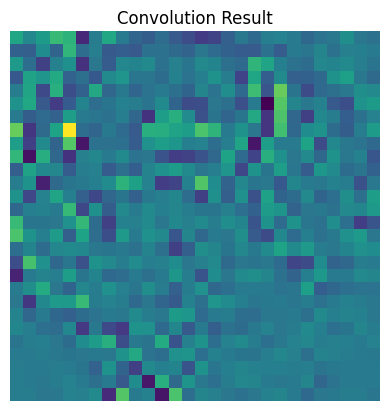

In [12]:
# Kernel array
laplacianKernel = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])

# Shape of the image and kernel
imageHeight, imageWidth = image.shape
kernelSize = laplacianKernel.shape[0]

# Perform convolution
convolutionResult = np.zeros((imageHeight - kernelSize + 1, imageWidth - kernelSize + 1))
for i in range(imageHeight - kernelSize + 1):
    for j in range(imageWidth - kernelSize + 1):
        localRegion = image[i:i+kernelSize, j:j+kernelSize]
        convolutionResult[i, j] = np.sum(localRegion * laplacianKernel)

# Print out results
print("First ten rows:")
print(convolutionResult[:10])

# Print out the shape and image
print("Shape:", convolutionResult.shape)

# Display convolution result as an image
plt.imshow(convolutionResult)
plt.title("Convolution Result")
plt.axis('off')
plt.show()




### 1.3 Modification on Convolution Scheme

Conduct the convolution with the same filter as above, but change the stride to 2. **(5 Points)**

**Tasks:**
1. Modify the convolution process with stride=2
2. **PRINT OUT** convolution result for first ten rows.
3. **PRINT OUT** the shape of the convolution result.
4. **DISPLAY** convolution result as image with matplotlib.(Don't worry about the value <0 or >255. Scaling process will be conducted in imshow function to make sure valid display.)

**Hints:**
1. You may just reduce the centroid pool according to stride=2, and then, follow the same convolution process above.
    **Note: After increase of stride, the size of convolution result is further shrinked. You may think about the reason.**
2. Validation for first 5X5 array (from upper-left corner), i.e., filtered_results[0:5,0:5]. The example figure is below.

[[ 134.   98.  173.    5.    3.]\
 [  96. -163.   68.  -10.   37.]\
 [   7. -141. -127.  142.   -6.]\
 [  -1.  -46.  109.  -13.   11.]\
 [ 106.   49.  241.  -26.  -33.]]


![](https://drive.google.com/uc?export=view&id=1UPdXt5cY1umImu2chaQLfWAnqDEpFOGV)


First ten rows:
[[ 134.   98.  173.    5.    3.  -87.  -92. -175.  -77.  -50.   25.  -58.
    -7.  -12.]
 [  96. -163.   68.  -10.   37.   49.   18.   43.  -30.  180.   16.  -43.
    28.   11.]
 [   7. -141. -127.  142.   -6.  -23.  -32.   31.   57.  205.  264. -135.
   -32.   61.]
 [  -1.  -46.  109.  -13.   11. -195.  159. -120.  -63.  143.  229. -165.
     8.  -27.]
 [ 106.   49.  241.  -26.  -33.   69.   84.   24.   13. -258.   -3.  125.
    40.  -22.]
 [ -79.   41.  -89.   18.  -31.   26.  103.  -10.   81.   77.  106.  -88.
    51.  -19.]
 [  76.   24.   15. -144.  -18.   -6.   36. -164.  -80. -120.  -65.   45.
   -33.  -32.]
 [ 196.  -18.   71.  -43.   20.   50.   42.   50.   59. -111.  -45.  -15.
    58. -169.]
 [ -38.  -43.   48.   -9.   -5.   26. -164.   61.  -16.   -5.  126.   96.
    -8.   71.]
 [-234.   26.  110.   29.  -39.  -31.   86. -111.  -10.   60.  -27.   15.
     1.   44.]]
Shape: (14, 14)


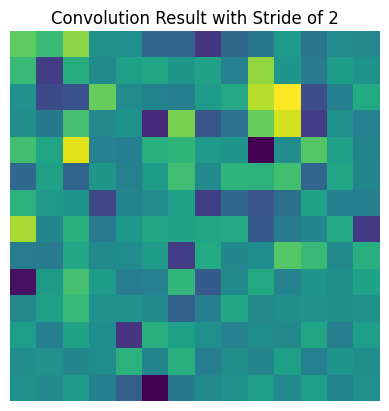

In [13]:
# calculate size of convolution result
convolutionResultLength = (imageHeight - kernelSize) // 2 + 1
convolutionResult = np.zeros((convolutionResultLength, convolutionResultLength))

# Perform convolution with stride of 2
for i in range(0, imageHeight - kernelSize + 1, 2):
    for j in range(0, imageWidth - kernelSize + 1, 2):
        localRegion = image[i:i+kernelSize, j:j+kernelSize]
        convolutionResult[i//2, j//2] = np.sum(localRegion * laplacianKernel)


print("First ten rows:")
print(convolutionResult[:10])

print("Shape:", convolutionResult.shape)

plt.imshow(convolutionResult)
plt.title("Convolution Result with Stride of 2")
plt.axis('off')
plt.show()

### 1.4 Implementation of MaxPooling

Process the obtained array from the image with MaxPooling operation. **(15 Points)**

**Tasks:**
1. Prepare a 2X2 pooling mask.
2. Conduct max pooing on image with prepared mask.
3. **PRINT OUT** convolution result for first ten rows.
4. **PRINT OUT** the shape of the convolution result.
5. **DISPLAY** convolution result as image with matplotlib.(Don't worry about the value <0 or >255. Scaling process will be conducted in imshow function to make sure valid display.)

**Hints:**
1. You may just modify the centroid pool to top-left corner pool, and then, follow the same strategy above.\
    **Note: After the pooling, the size of the array is shrinked. You may think about the reason.**
2. Validation for first 5X5 array (from upper-left corner), i.e., pooled_results[0:5,0:5].The example figure is below.

[[ 98. 112.  93. 195. 173.]\
 [ 84. 127. 137. 253. 254.]\
 [ 85. 145. 225. 255. 242.]\
 [104. 178. 216. 230. 242.]\
 [ 95. 186. 147. 248. 242.]]

![](https://drive.google.com/uc?export=view&id=1a18IWjrN0xHcp7bSNuj8kUM4JFFj3ebd)



First ten rows:
[[ 98. 112.  93. 195. 173. 209. 206. 237. 223. 185. 167. 169. 136.  54.
   55.]
 [ 84. 127. 137. 253. 254. 249. 241. 250. 236. 224. 181. 173. 124.  55.
   59.]
 [ 85. 145. 225. 255. 242. 247. 236. 232. 192. 208. 146. 199. 178. 103.
   65.]
 [104. 178. 216. 230. 242. 238. 176. 218. 186. 198. 203. 165. 179. 168.
   78.]
 [ 95. 186. 147. 248. 242. 221.  62.  74.  95. 182. 155.  91. 145. 161.
  116.]
 [201. 201. 229. 217. 210. 188. 169. 164. 111. 154.  81. 104. 104. 141.
  158.]
 [184. 212. 180. 214. 193. 148. 191. 141. 127. 140. 114. 113. 115. 139.
  102.]
 [172. 105.  61. 149. 189. 119. 106. 120. 109. 148.  95. 110. 102. 110.
   94.]
 [186.  41.  34. 104. 153.  91. 172. 147.  98. 143. 136.  92.  83.  37.
   87.]
 [207.  94.  42.  75.  95.  99. 104. 120. 101.  94. 116. 149.  83.  64.
   42.]]
Shape of the pooling result: (15, 15)


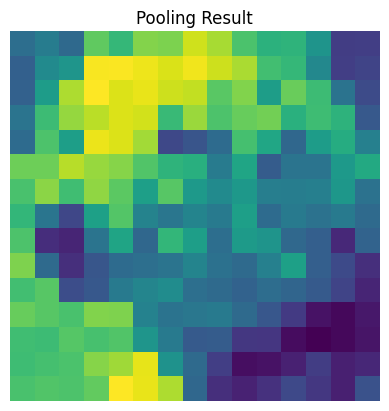

In [14]:
# Prepare pooling mask
poolingMask = np.ones((2, 2))

poolingResultLength = imageHeight // 2
poolingResult = np.zeros((poolingResultLength, poolingResultLength))

# Perform max pooling
for i in range(0, imageHeight, 2):
    for j in range(0, imageWidth, 2):
        localRegion = image[i:i+2, j:j+2]
        poolingResult[i//2, j//2] = np.max(localRegion)


print("First ten rows:")
print(poolingResult[:10])

print("Shape of the pooling result:", poolingResult.shape)

plt.imshow(poolingResult)
plt.title("Pooling Result")
plt.axis('off')
plt.show()

## 2 - Convolution Neural Network ##

In this section, we will use LeNet-5 (LeCun et al., 1998), one of representative deep nueral networks, to solve a  classification problem with Fashion MNIST benchmark. You can feel free to read the original paper at http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf.

### 2.1 Training Data Preparation

Import useful packages and prepare Fashion MNIST data. **(20 Points)**

**Tasks:**
1. Use **torchvision.datasets** to download Fashion MNIST data for training and testing.
2. Use **torchvision.transforms** to preprocess training and testing data using  using transformations including: random crop(i.e., randomly crop into 28x28 blocks with padding 4), random rotation (i.e., randomly rotates within 15 degree) and normalization (normalize to mean .1307 and std 0.3081). You may convert the image from pil.Image to torch.Tensor if necessary.
3. Use **torch.utils.data.DataLoader** to load the training and testing data with mini-batch, set the batch size to be 128.
3. **PRINT OUT** images in the first mini batch of training set with their correponding labels (i.e., index from 0-9).
4. **PRINT OUT** the number of training samples, the number of test samples and the shape of data.

**Hints**
1. You can refer to the example on https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html about data preprocessing.
2. You can read the documentation about datasets supported by pytorch: https://pytorch.org/vision/main/datasets.html?highlight=datasets

First mini batch:
Number of training samples: 60000
Number of test samples: 10000
Shape of data: torch.Size([128, 1, 28, 28])


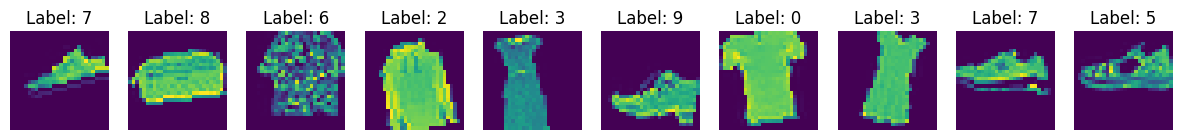

In [15]:
# Import libraries
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

# Download fashionMNIST dataset
trainDataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True)
testDataset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True)

# Preprocess training and testing data using required transforms
transform = transforms.Compose([
    transforms.RandomCrop(size=28, padding=4),
    transforms.RandomRotation(degrees=15),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.1307,), std=(0.3081,))
])
trainDataset.transform = transform
testDataset.transform = transform

#Load the training and testing data with mini-batch
batchSize = 128
trainLoader = torch.utils.data.DataLoader(dataset=trainDataset, batch_size=batchSize, shuffle=True)
testLoader = torch.utils.data.DataLoader(dataset=testDataset, batch_size=batchSize, shuffle=False)

# Print out images in the first mini batch
dataIterator = iter(trainLoader)
images, labels = next(dataIterator)
print("First mini batch:")
fig, axes = plt.subplots(1, 10, figsize=(15, 3))
for i in range(10):
    axes[i].imshow(images[i].squeeze().numpy())
    axes[i].set_title(f"Label: {labels[i]}")
    axes[i].axis('off')

# Print out the number of training samples, the number of test samples, and the shape of data
print(f"Number of training samples: {len(trainDataset)}")
print(f"Number of test samples: {len(testDataset)}")
print(f"Shape of data: {images.shape}")

### 2.2 Implement LeNet-5 Achitecture

Construct LeNet-5 as learning model for Fashion MNIST classification task. **(15 Points)**

**Tasks:**
1. Build LeNet-5 by creating a new class named 'Net' that inherit nn.Module. Override __init__ and **forward** functions to include necessary network componenets and forward process for neural network.

2. **PRINT OUT** the model summary using torchsummary library (import torchsummary).

**Hints:**
1. You may consider the convolution neural network shown in class as an example. Or https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html.
2. The general structure of LeNet-5 is listed below. Try to fill in the missing parts along with pytorch documentations (https://pytorch.org/docs/stable/index.html).
3. Some architecture settings are listed below.
    - To have 32 X 32 input, you need padding=2 for the first 2D convolution filter (original image is 28 X 28)
    - The kernel size for 2D convolution filter is **5 X 5**. You may think about the reason by calculation.
    - We change tanh activation to **"relu"** activation here.
    - We use MaxPooling instead of original AveragePooling. Please use size 2 X 2 for implementation.
    - Please use **Flatten** to onvert 2D convolution layer to 1D fully connected layer.
    - Gaussian connections are replaced with Softmax, and thus, the outputs are activated by Softmax function based on the number of classes.

4. Validation result:
    - Total params: 61,706
    - Trainable params: 61,706
    - Non-trainable params: 0

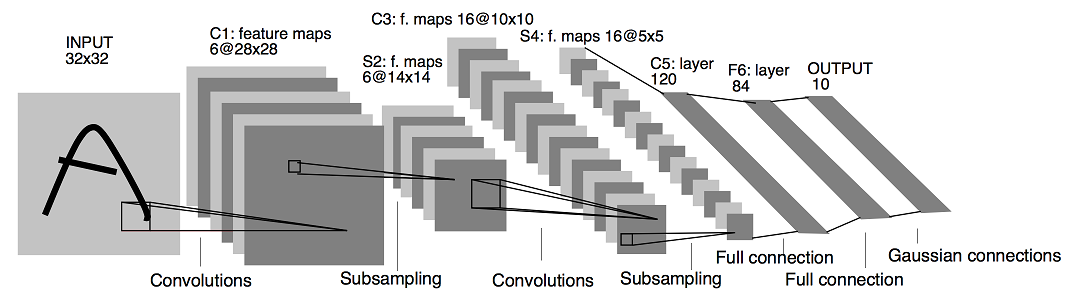

**References:**
- http://yann.lecun.com/exdb/lenet/


In [16]:
from torchsummary import summary

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(in_features=16*5*5, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=84)
        self.fc3 = nn.Linear(in_features=84, out_features=10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2, stride=2)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        output = self.fc3(x)
        return output

# Decide whether you want to run your model on cpu or gpu.
device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = Net().to(device)
summary(net, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
            Conv2d-2           [-1, 16, 10, 10]           2,416
            Linear-3                  [-1, 120]          48,120
            Linear-4                   [-1, 84]          10,164
            Linear-5                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.05
Params size (MB): 0.24
Estimated Total Size (MB): 0.29
----------------------------------------------------------------


### 2.3 Training LeNet-5 Model

Train LeNet-5 model with specific training strategy. **(20 Points)**

**Tasks:**
1. Pick **SGD optimizer** with learning rate of **0.1**, momentum of **0.9**, and **nesterov=True**, for model training.
2. Pick **cross-entropy** loss function for optimization and evaluation metrics is set to **accuracy**.
3. Train the model with **10 epochs** and **PRINT OUT** : **train loss** and **train accuracy** after each epoch.
4. Evaluate model with test data set and **PRINT OUT** : **test loss** and **test accuracy**.

**Hints:**
1. You may consider the examples from Pytorch for optimizer. https://pytorch.org/docs/stable/optim.html
2. You may see slightly different results every time you run the training. It is normal since there is randomness for training. You may use different random seed to validate this observation.
4. You should expect the BEST validation accuracy is above 87% which may not be the result from last epoch.”

In [17]:
# Import needed library
import torch.optim as optim

# Use cross-entropy loss function and SGD optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=4e-5, nesterov=True)

# Loop through 10 epochs of training
for epoch in range(10):

    runningLoss = 0.0
    correct = 0
    total = 0
    for i, data in enumerate(trainLoader, 0):
        # Get the inputs
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()

        # Forwards, backwards, and optimizer steps
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        runningLoss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # Print train loss and accuracy after each epoch
    print(f"Epoch [{epoch + 1}/10], Loss: {runningLoss / len(trainLoader):.4f}, Accuracy: {100 * correct / total:.2f}%")



Epoch [1/10], Loss: 0.8590, Accuracy: 66.74%
Epoch [2/10], Loss: 0.5809, Accuracy: 77.58%
Epoch [3/10], Loss: 0.5463, Accuracy: 78.75%
Epoch [4/10], Loss: 0.5277, Accuracy: 79.65%
Epoch [5/10], Loss: 0.5189, Accuracy: 80.14%
Epoch [6/10], Loss: 0.5142, Accuracy: 80.25%
Epoch [7/10], Loss: 0.5046, Accuracy: 80.66%
Epoch [8/10], Loss: 0.5063, Accuracy: 80.79%
Epoch [9/10], Loss: 0.4968, Accuracy: 80.95%
Epoch [10/10], Loss: 0.4994, Accuracy: 81.06%


In [18]:
# evaluate model with testing data
test_loss = 0.0
correct = 0
total = 0
with torch.no_grad():
    for data in testLoader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Print test loss and accuracy for testing data
print(f"Test Loss: {test_loss / len(testLoader):.4f}, Test Accuracy: {100 * correct / total:.2f}%")

Test Loss: 0.5084, Test Accuracy: 80.39%


### 2.4 Visualization (Bonus session, optional)

Use T-sne to visualize the validation clustering result. **(10 Points)**

**Hint:**
1. Use 'sklearn' python package. This is a complicate operation and you are free to use this package.
2. Read the instruction from 'sklearn.manifold.TSNE' and the paper, https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf to understand the idea. You can feel free to refer to other online examples.
3. Visualize the model's prediction on the testing set using T-sne.

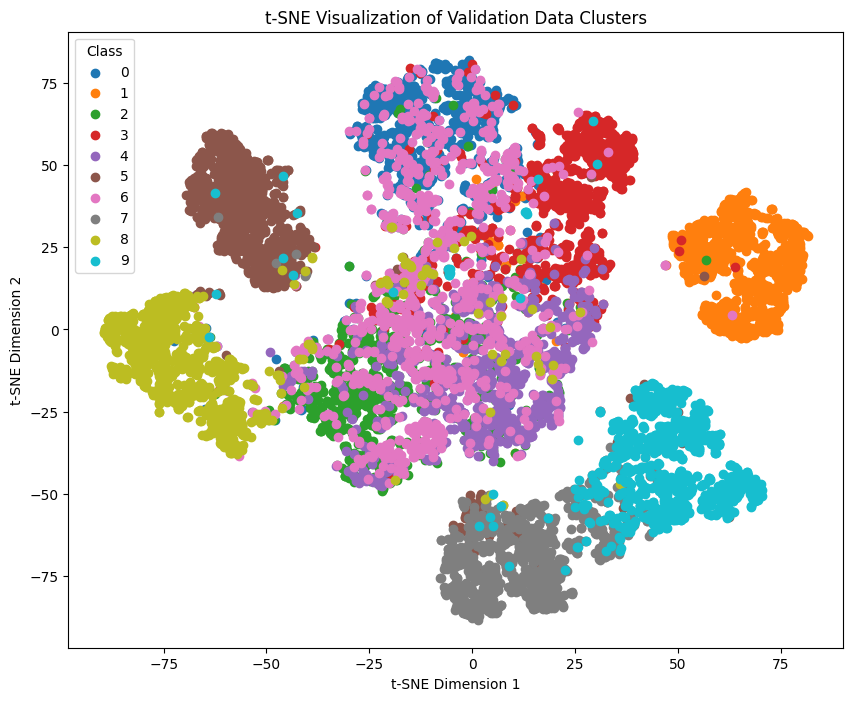

In [19]:
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Function to get predictions for validation data
def get_predictions(model, dataloader):
    model.eval()
    predictions = []
    targets = []
    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            predictions.extend(predicted.cpu().numpy())
            targets.extend(labels.cpu().numpy())
    return np.array(predictions), np.array(targets)


valPredictions, valTargets = get_predictions(net, testLoader)

# Define a forward hook
outputsHook = []
def hook(module, input, output):
    outputsHook.append(output.cpu().numpy())

net.fc2.register_forward_hook(hook)

# Apply t-SNE to the output
embeddedData = []
with torch.no_grad():
    for images, _ in testLoader:
        images = images.to(device)
        _ = net(images)
        embeddedData.extend(outputsHook)
        outputsHook = []

# Reshape the embedded data
embeddedData = np.vstack(embeddedData).reshape(-1, net.fc2.out_features)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
embeddedDataTsne = tsne.fit_transform(embeddedData)

# Visualize the clusters
plt.figure(figsize=(10, 8))
for i in range(10):
    plt.scatter(embeddedDataTsne[valTargets == i, 0], embeddedDataTsne[valTargets == i, 1], label=str(i))
plt.legend(title="Class")
plt.title("t-SNE Visualization of Validation Data Clusters")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()